## 기업과제 2: 데이터 분석 및 시각화

- 작성자: 9팀 강민지

In [60]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
import datetime

In [2]:
# Load YouTube Popular Video Data
data = pd.read_csv('pretest_data.csv')

In [56]:
# Change the datatypes of date-related columns into 'datetime' type

date_columns = ['published_date', 'on_trending_date', 'off_trending_date']
for column in date_columns:
    data[column] = pd.to_datetime(data[column])
    
# Change the datatype of video duration into 'timedelta' type

data['duration'] = pd.to_timedelta(data['duration'])

### Q1. 데이터 타입별 시각화 (자유양식) 

#### 1) 전체기간 카테고리 -> 채널 -> 비디오 개수

In [3]:
# Define a list with unique category names
category_names = data['category_name'].unique()

# Define a dataframe which shows how many videos were uploaded by a single channel under a certain category
q1_data = data.groupby(['category_name', 'channel_id'])['video_id'].count().reset_index()
q1_data.rename(columns={'video_id':'video_cnt'}, inplace=True)

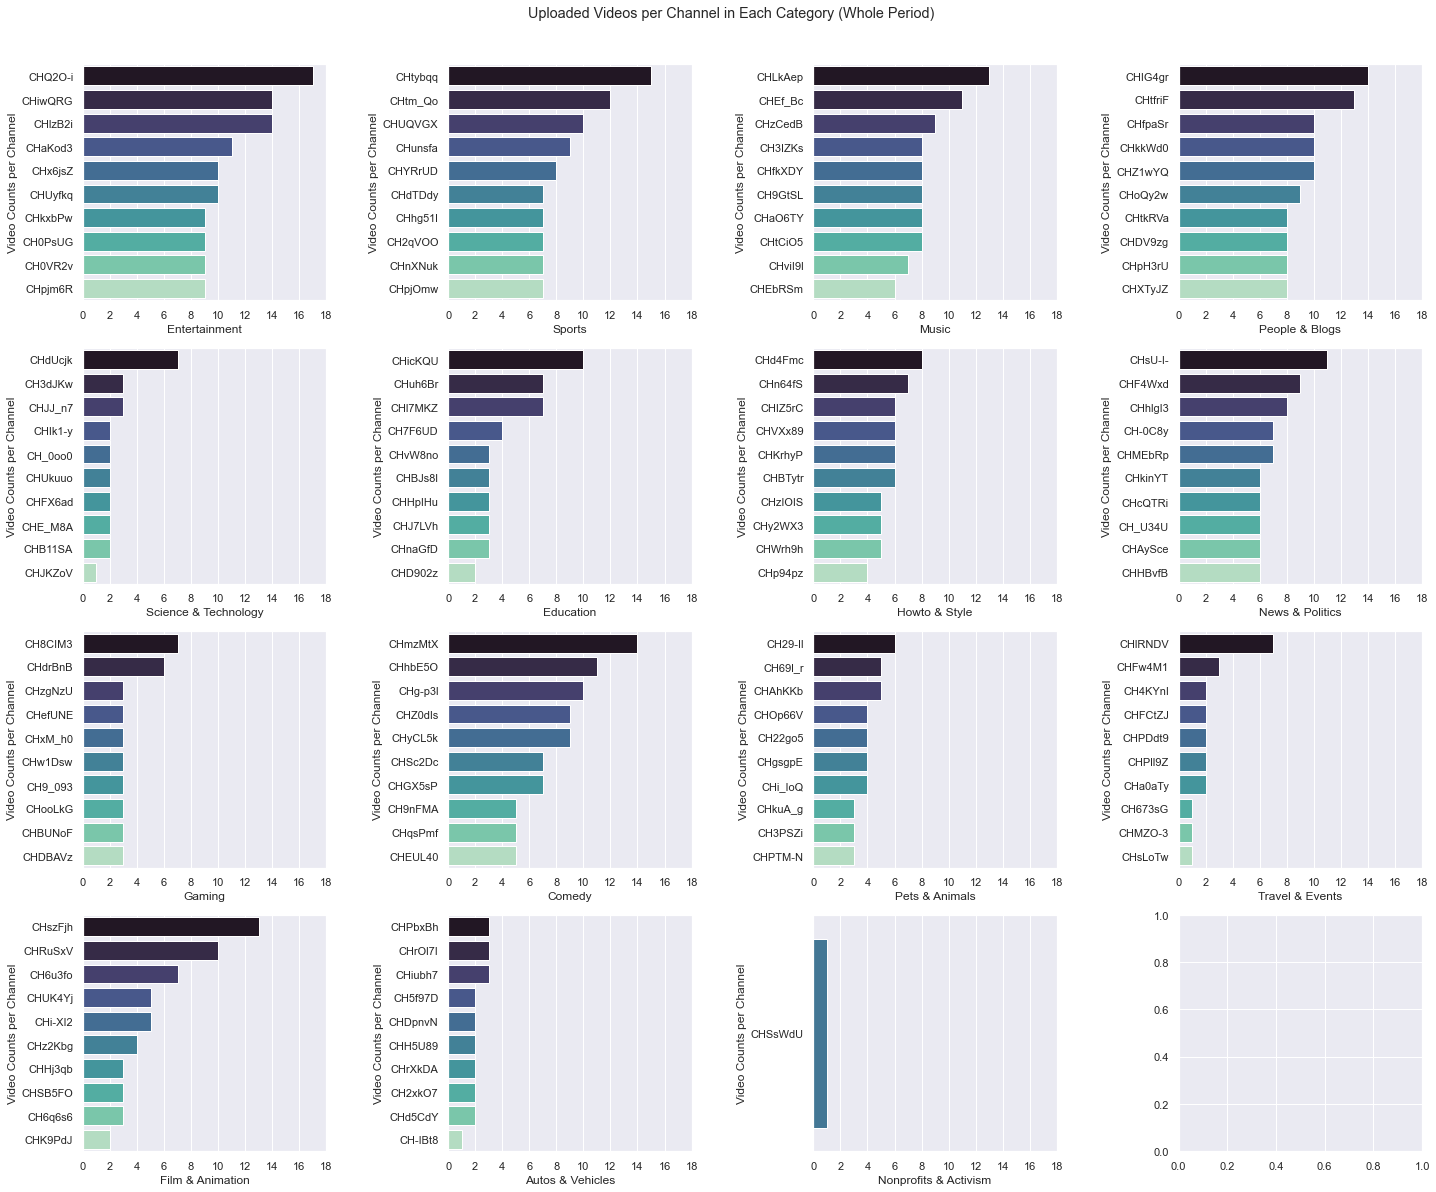

In [13]:
# Draw separate graphs for each category
# Each graph shows top 10 channels (calculated by total video counts) and their total video counts

# Define how many channels will be shown in each graph
top_channel_threshold = 10

# Draw graphs
fig, axs = plt.subplots(4, 4, figsize=(24, 20))
plt.suptitle('Uploaded Videos per Channel in Each Category (Whole Period)', position=(0.5, 0.92))
plt.subplots_adjust(wspace=0.5)
sns.set(style='darkgrid')

for idx, category in enumerate(category_names):
    row_idx, col_idx = divmod(idx, 4)
    df = q1_data[q1_data['category_name'] == category].sort_values(by='video_cnt', ascending=False)[['channel_id', 'video_cnt']][:top_channel_threshold]
    
    ax = sns.barplot(data=df, x=df['video_cnt'], y=df['channel_id'], ax=axs[row_idx, col_idx], palette='mako')
    ax.set_xticks(range(0, 20, 2))
    ax.set(xlabel=f"{category}", ylabel="Video Counts per Channel")

#### 2) 월별 카테고리 -> 채널 -> 비디오 개수

In [19]:
# Define a dataframe in which data are grouped by 'the published month of a video'
q2_data = data.copy()
q2_data['video_cnt'] = 1
q2_data = q2_data.set_index('published_date')\
                 .groupby([pd.Grouper(freq='M'), 'category_name', 'channel_id'])['video_cnt'].sum().reset_index()

# Change the 'published_date' info to 'published_month' info
q2_data['published_date'] = q2_data['published_date'].apply(lambda x:x.month)
q2_data.rename(columns={'published_date':'published_month'}, inplace=True)

In [142]:
# Define separate dataframes in which mean/max/min number of videos are calculated for each month and category
monthly_total_per_cat = q2_data.groupby(['published_month', 'category_name'])['video_cnt'].sum().reset_index()
monthly_mean_per_cat = q2_data.groupby(['published_month', 'category_name'])['video_cnt'].mean().reset_index()
monthly_max_per_cat = q2_data.groupby(['published_month', 'category_name'])['video_cnt'].max().reset_index()
monthly_min_per_cat = q2_data.groupby(['published_month', 'category_name'])['video_cnt'].min().reset_index()

In [44]:
# Define a function which draws 1) barplot and 2) pointplot for monthly-grouped data

def draw_monthly_graph(df_name, criterion: str):

    fig, ax1 = plt.subplots(figsize=(20, 10))

    sns.barplot(data=df_name,
                x='published_month',
                y='video_cnt',
                hue='category_name',
                ax=ax1,
                palette='mako')
    plt.ylabel(f'{criterion.capitalize()} Number of Videos Uploaded (Barplot)')

    ax2 = ax1.twinx()
    sns.pointplot(data=df_name,
                x='published_month',
                y='video_cnt',
                hue='category_name',
                ax=ax2,
                marker='o',
                palette='mako',
                legend=None)
    plt.ylabel(f'{criterion.capitalize()} Number of Videos Uploaded (Pointplot)')

    locs, labels = plt.xticks()
    plt.xticks(ticks=locs,
            labels=['March', 'April', 'May', 'June', 'July'])
    plt.title(f'{criterion.capitalize()} Number of Videos Uploaded per Month for Each Category')
    plt.show()

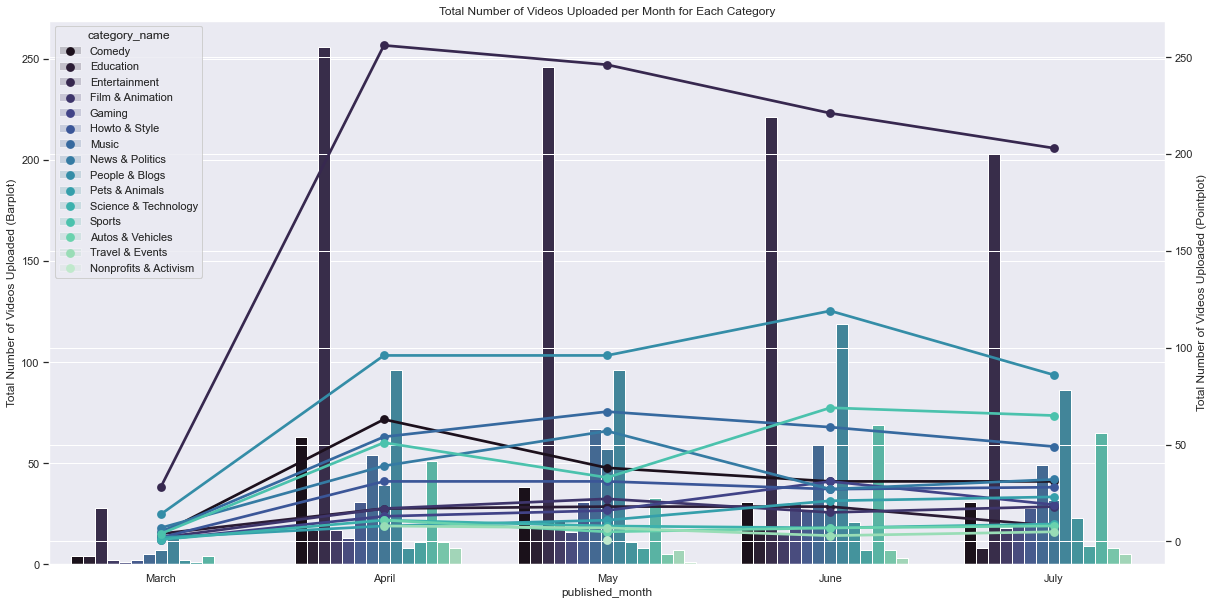

None

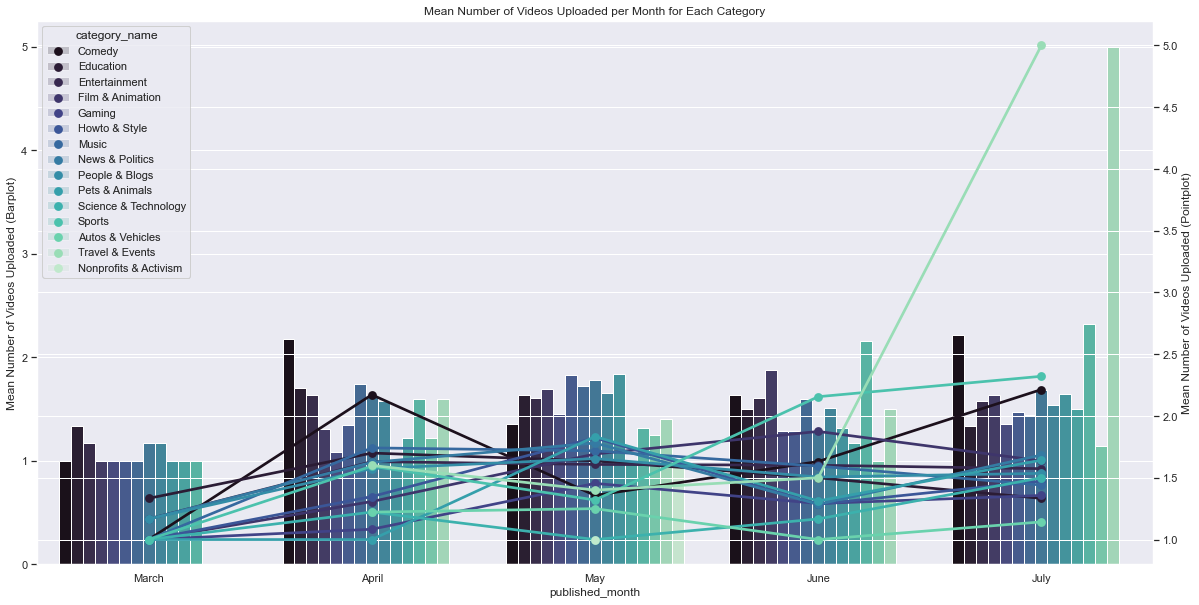

None

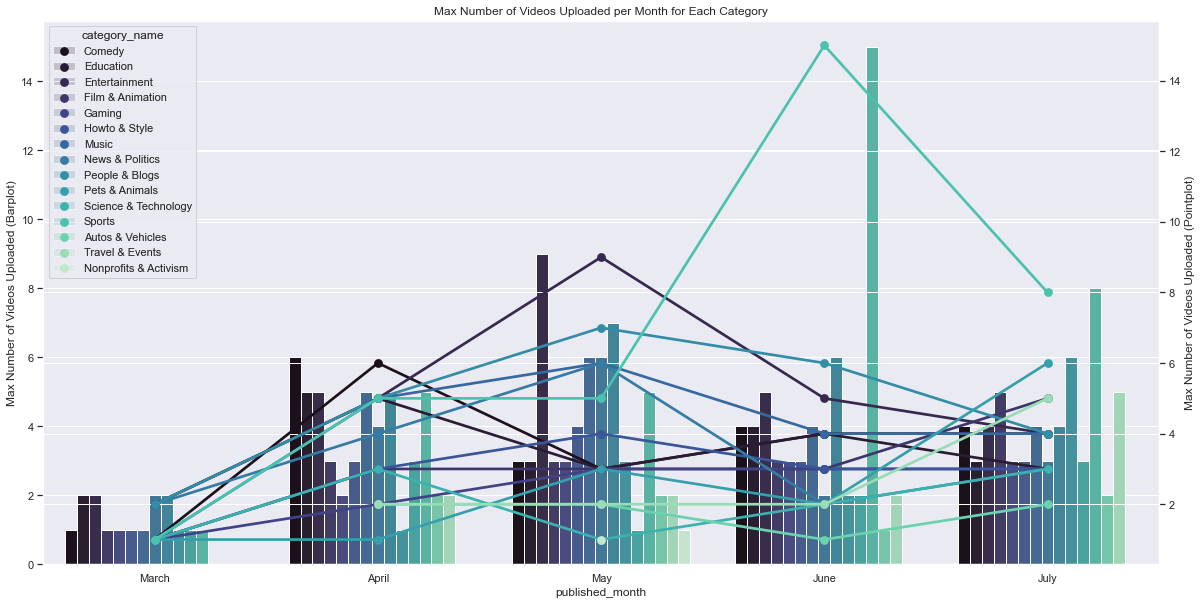

None

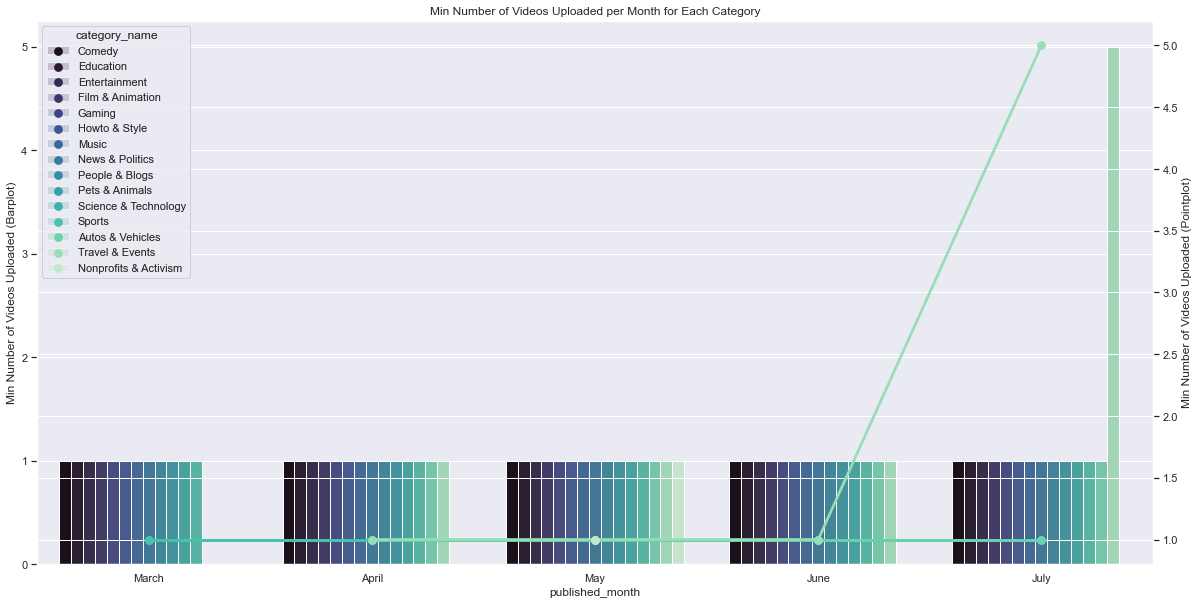

None

In [143]:
# Draw graphs
display(draw_monthly_graph(monthly_total_per_cat, 'total'))
display(draw_monthly_graph(monthly_mean_per_cat, 'mean'))
display(draw_monthly_graph(monthly_max_per_cat, 'max'))
display(draw_monthly_graph(monthly_min_per_cat, 'min'))

#### 3) 월별 TOP10 채널 (분류 기준은 비디오 개수)

In [58]:
# Define a dataframe in which data are grouped by 'the published month of a video'
q3_data = data.copy()
q3_data['video_cnt'] = 1
q3_data = q3_data.set_index('published_date')\
                 .groupby([pd.Grouper(freq='M'), 'channel_id'])['video_cnt'].sum().reset_index()

# Change the 'published_date' info to 'published_month' info
q3_data['published_date'] = q3_data['published_date'].apply(lambda x:x.month)
q3_data.rename(columns={'published_date':'published_month'}, inplace=True)

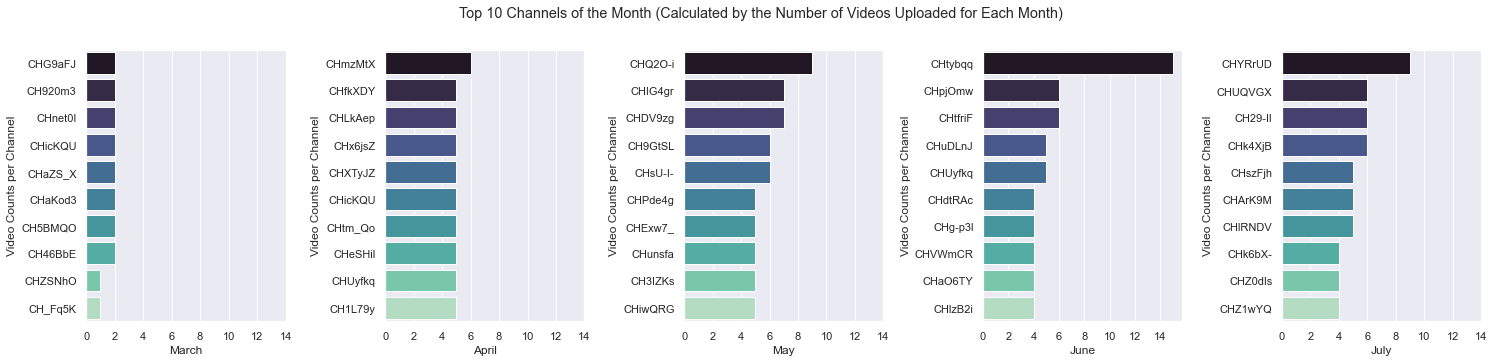

In [57]:
# Draw separate graphs for each month
# Each graph shows top 10 channels (calculated by total video counts of the month) and their total video counts

# Define how many channels will be shown in each graph
top_channel_threshold = 10

# Create a mapping dict for month names
month_names = {3:'March',
               4:'April',
               5:'May',
               6:'June',
               7:'July'}

# Draw graphs
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
plt.suptitle('Top 10 Channels of the Month (Calculated by the Number of Videos Uploaded for Each Month)', position=(0.5, 1))
plt.subplots_adjust(wspace=0.5)
sns.set(style='darkgrid')

for idx, month in enumerate(range(3, 8)):
    df = q3_data[q3_data['published_month'] == month].sort_values(by='video_cnt', ascending=False)[['channel_id', 'video_cnt']][:top_channel_threshold]
    
    ax = sns.barplot(data=df, x=df['video_cnt'], y=df['channel_id'], ax=axs[idx], palette='mako')
    ax.set_xticks(range(0, 16, 2))
    ax.set(xlabel=f"{month_names[month]}", ylabel="Video Counts per Channel")

#### 4) 주별 TOP5 채널 (분류 기준은 비디오 개수)

In [77]:
# Define a dataframe in which data are grouped by 'the published week of a video'
q4_data = data.copy()
q4_data['video_cnt'] = 1
q4_data = q4_data.set_index('published_date')\
                 .groupby([pd.Grouper(freq='W'), 'channel_id'])['video_cnt'].sum().reset_index()

# Change the 'published_date' info to 'published_week' info
q4_data.rename(columns={'published_date':'published_week'}, inplace=True)

# Change the format of the 'published_week'(Y-M-D) to M-D
q4_data['published_week'] = q4_data['published_week'].apply(lambda x: x.strftime('%m-%d'))

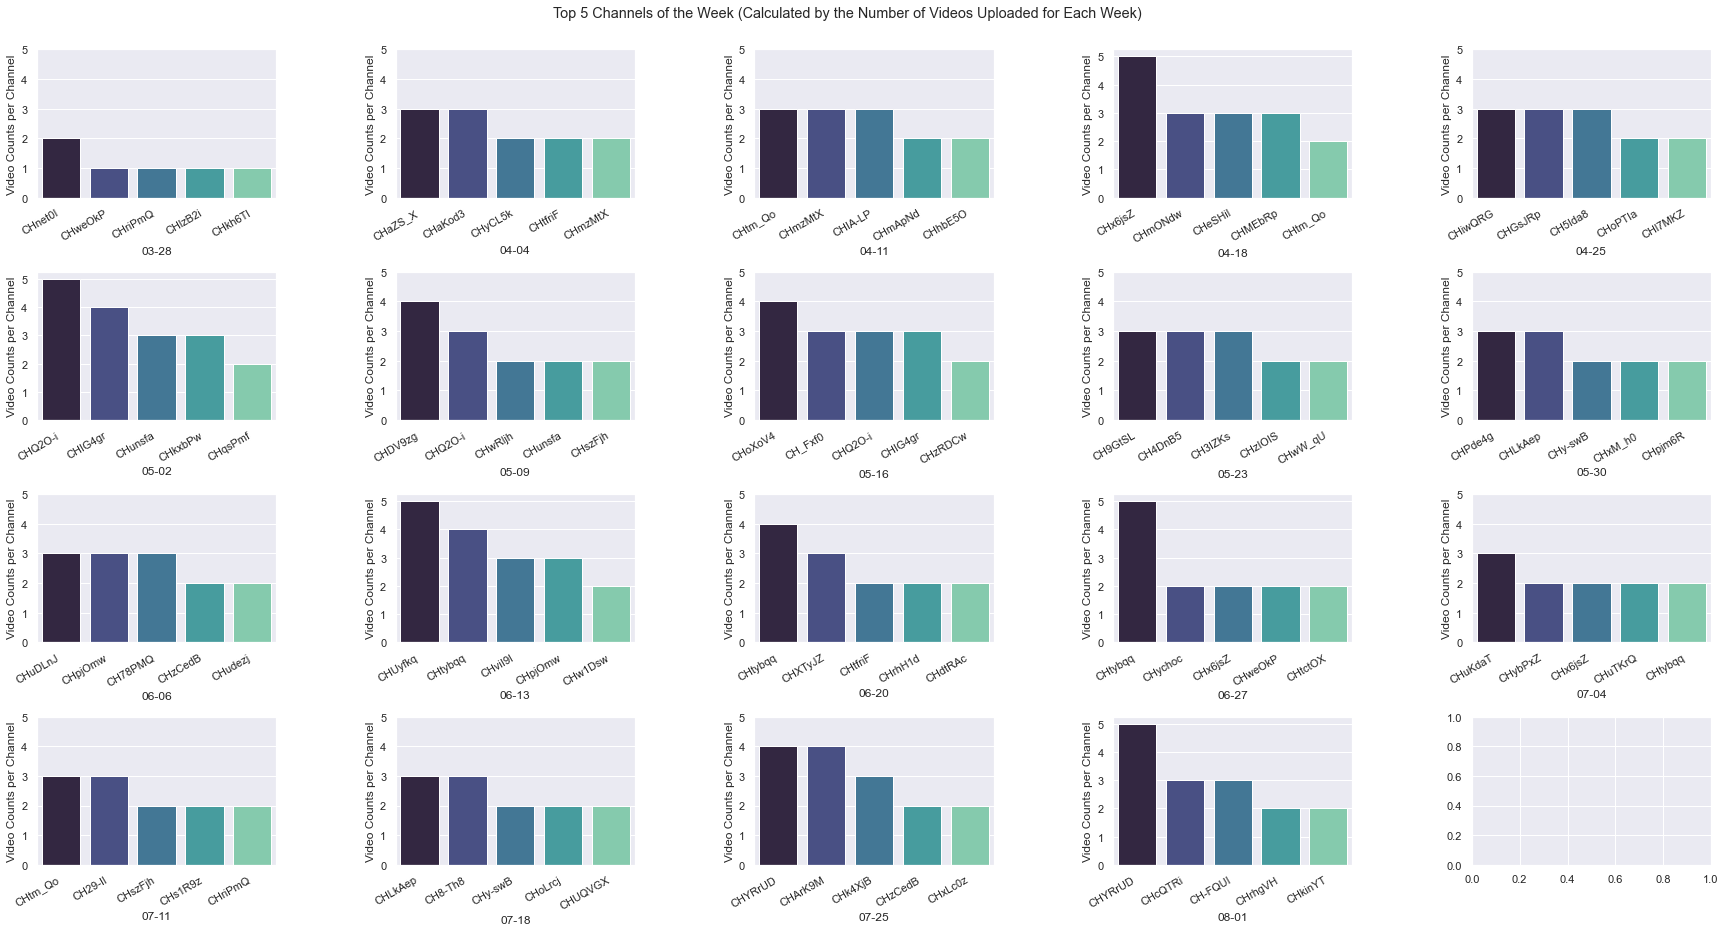

In [95]:
# Draw separate graphs for each week
# Each graph shows top 5 channels (calculated by total video counts of the week) and their total video counts

# Define how many channels will be shown in each graph
top_channel_threshold = 5

# Draw graphs
fig, axs = plt.subplots(4, 5, figsize=(30, 15))
plt.suptitle(f'Top {top_channel_threshold} Channels of the Week (Calculated by the Number of Videos Uploaded for Each Week)', position=(0.5, 0.92))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
sns.set(style='darkgrid')

for idx, week in enumerate(q4_data['published_week'].unique()):
    row_idx, col_idx = divmod(idx, 5)
    df = q4_data[q4_data['published_week'] == week].sort_values(by=['video_cnt', 'channel_id'], ascending=False)[['channel_id', 'video_cnt']][:top_channel_threshold]
    
    ax = sns.barplot(data=df, x=df['channel_id'], y=df['video_cnt'], ax=axs[row_idx, col_idx], palette='mako')
    ax.set_xticklabels(df['channel_id'], rotation=30, ha='right')
    ax.set_yticks(range(6))
    ax.set(xlabel=f"{week}", ylabel="Video Counts per Channel")

#### 5) 월별 카테고리별 태그 키워드 순위

In [256]:
# Define a dataframe having the following features: published_date, category_name, tags
q5_data = data[['published_date', 'category_name', 'tags']].dropna()
q5_data['published_date'] = q5_data['published_date'].apply(lambda x:x.month)
q5_data.rename(columns={'published_date':'published_month'}, inplace=True)

# Define a dictionary and list consisting of month/category names
month_names = {3:'March',
               4:'April',
               5:'May',
               6:'June',
               7:'July'}
category_names = q5_data['category_name'].unique()

In [267]:
# Create a table with top 10 monthly tags for each category

for category in category_names:
    print(f'Top 10 Tag Rankings for "{category}" Category')
    cat_keyword_df = pd.DataFrame()
    
    for month in list(month_names.keys()):
        query = (q5_data['published_month'] == month) & (q5_data['category_name'] == category)
        temp_df = q5_data[query]
        tag_lst = []
        
        for tags in temp_df['tags'].values:
            tag_lst.extend(tags.lower().split('|'))
        
        tag_rankings = pd.DataFrame({month:list(map(lambda x:x[0], Counter(tag_lst).most_common(10)))})
        cat_keyword_df = pd.concat([cat_keyword_df, tag_rankings], axis=1)
    
    cat_keyword_df.rename(columns=month_names, inplace=True)
    display(cat_keyword_df)

Top 10 Tag Rankings for "Entertainment" Category


,March,April,May,June,July
0,kbs,예능,tvn,먹방,유재석
1,유재석,먹방,bts,예능,sbs
2,sbs,sbs,먹방,kpop,예능
3,kbsworld,브레이브걸스,방탄소년단,sbs,먹방
4,아이유,롤린,피오,레전드,tvn
5,documentary,유재석,패션,유재석,레전드
6,kpop,유나,라면,mukbang,runningman
7,k-pop,쁘걸,이수근,개그,kpop
8,eng,유정,p.o,아이돌,하하
9,idol,민영,kpop,하하,런닝맨


Top 10 Tag Rankings for "Sports" Category


,March,April,May,June,July
0,골프,손흥민,메이저리그,축구,도쿄올림픽
1,골프레슨,토트넘,류현진,손흥민,올림픽
2,golf,축구,토론토,football,스포츠
3,golf lesson,스포티비,토론토블루제이스,유로,spotv
4,드라이버,spotv,mlb,이동국,스포티비
5,아이언,맨유,조미예,euro,축구
6,골프맨,무리뉴,블루제이스,euro2020,이강인
7,조윤성프로,하이라이트,조미예의 mlb현장,tvn,kbs
8,골프스윙,김국진골프,축구,xtvn,금메달
9,비거리,황의조,맨시티,메시,김제덕


Top 10 Tag Rankings for "Music" Category


,March,April,May,June,July
0,music,seventeen,bts,kpop,bts
1,kpop,bts,kpop,음악,방탄소년단
2,아이돌,セブチ,방탄소년단,twice,hiphop
3,baekhyun,세븐틴,aespa,트와이스,permission to dance
4,bambi - the 3rd mini album,hiphop,bangtan,kbskpop,알엠
5,bambi,방탄소년단,p nation,brave girls,rm
6,딩고뮤직,bangtan,음악,kbs,suga
7,dingo,k-pop,라이브,k-pop,지민
8,dingomusic,알엠,에스파,dingo,jimin
9,live,rm,happen,딩고,정국


Top 10 Tag Rankings for "People & Blogs" Category


,March,April,May,June,July
0,강철부대,먹방,먹방,먹방,먹방
1,특수부대,vlog,mukbang,vlog,브이로그
2,육군특수전사령부,브이로그,머니게임,브이로그,vlog
3,특전사,korean,vlog,맛집,mukbang
4,udt해군특수전전단,mukbang,진용진,mukbang,국제커플
5,udt,맛집,핫소스,일상,자취
6,제707특수임무단,요리,브이로그,asmr,일상
7,707,asmr,쿡방,이과장,real sound
8,대테러 부대,중소기업드라마,요리용디,중낳괴,리얼사운드
9,해병대,streetfood,웅이,좋좋소,배말랭


Top 10 Tag Rankings for "Science & Technology" Category


,March,April,May,June,July
0,ytn사이언스,apple,애플,apple,unboxing
1,사이언스투데이,아이맥,apple,apple event,해부
2,과학,애플,아이맥,apple keynote,4k
3,뉴스,imac,imac m1,apple special event,4k 모니터
4,사이언스tv,에어태그,apple imac,apple wwdc,주연테크
5,NaN,아이패드 프로 5세대,unboxing,june,가성비 모니터
6,NaN,apple event,아이패드 프로 12.9,developers,갓성비
7,NaN,ipad pro,귀상어,world wide developers conference,4k 모니터 입문용
8,NaN,m1,머리,2021,입문용
9,NaN,아이패드,상어,wwdc,언박싱


Top 10 Tag Rankings for "Howto & Style" Category


,March,April,May,June,July
0,사나고,사나고,요리,한식,반찬
1,3d펜,만들기,간단요리,밑반찬,요리
2,3dpen,3d펜,양배추,반찬,한식
3,만들기,3dpen,꿀팁,영자씨의 부엌,레시피
4,making,making,쉬운요리,korean recipes,간단요리
5,3d프린터,3d프린터,초보요리,korean mom,recipe
6,3dprinting,3dprinting,함께해요 맛나요리,k-food,만들기
7,계란부침,계란,한식,korean style food,함께해요 맛나요리
8,계란부침 만들기,달걀,간단한 요리,banchan,사나고
9,계란부침 레시피,계란먹는법,하체비만,자취음식,간식


Top 10 Tag Rankings for "News & Politics" Category


,March,April,May,June,July
0,박수홍,뉴스,뉴스,뉴스,도쿄올림픽
1,출연료,news,손정민,news,뉴스
2,횡령,kbs,news,kbs,news
3,mbn,주식,의대생,mbc뉴스,올림픽
4,오열,etf,cctv,뉴스데스크,news network
5,다홍이,윤여정,코로나19,뉴스투데이,영상
6,뉴스파이터,news network,jtbc,경찰,sbs
7,김명준앵커,sbs videomug,jtbc news,news network,sbs news
8,sns,videomug,뉴스룸,광주,sbs 뉴스
9,가족,비디오머그,손석희,인터뷰,에스비에스


Top 10 Tag Rankings for "Gaming" Category


,March,April,May,June,July
0,리그오브레전드,먹방,먹방,프나펌,kbs
1,리그 오브 레전드,리그오브레전드,웃긴,fnf,먹방
2,lol,lol,재밌는,프라이데이 나이트 펌킨,혜안
3,leagueoflegends,얼공,아프리카tv,friday night funkin,마인크래프트
4,league of legends,#리그오브레전드,혜안,t1,minecraft
5,riotgames,#롤,병맛,프나펑,kbs esports
6,라이엇 게임즈,#괴물쥐,배틀그라운드,skt,esports kbs
7,NaN,#원딜,취한무드등,friday night funkin',이스포츠
8,NaN,#트위치,취무등,프라이데이 나이트 펑킨,이스포츠 케이비에스
9,NaN,t1,취한무드등 썰,모바일게임,케이비에스


Top 10 Tag Rankings for "Comedy" Category


,March,April,May,June,July
0,웃긴영상,몰카,몰카,korean,어몽어스애니
1,시트콤,몰래카메라,피식대학,반응,어몽어스애니메이션
2,몰카,개그맨,더블비,라면,among us animation
3,#깨방정,레전드,참교육,영국남자,korean
4,#정승빈,korean,웃긴영상,영국,웃소
5,#몰카,웃소,몰래카메라,조쉬,bts
6,#미녀,보물섬,핫소스,올리,꼰대희
7,#개그맨,장난,보물섬,josh,김대희
8,#존잘남,prank,개그맨,ollie,밥묵자
9,#존예녀,동네놈들,아프리카tv,koreanenglish,장동민


Top 10 Tag Rankings for "Pets & Animals" Category


,March,April,May,June,July
0,고양이,브이로그,animals,고양이,cat
1,cat,vlog,animal farm,강아지,냥줍
2,하하하,일상,애니멀봐,pet,고양이
3,hahaha,동물병원,동물농장,shorts,dog
4,haha ha,애니멀봐,동물영상,dog,새끼 길고양이
5,하하 하,동물농장,강아지,아리랑,chat
6,무,tv동물농장,cute dogs,포메라니안,alley cat
7,mu,동물농장 애니멀봐,진솔쓰,동물,포메라니안
8,강아지,애니멀봐 동물농장,jinsolss,cat,매탈남
9,puppy,sbs animal farm,jinsols,teaser,매탈남 고양이


Top 10 Tag Rankings for "Travel & Events" Category


,March,April,May,June,July
0,NaN,베트남,길거리음식,캠핑카,러시아 여행
1,NaN,국제커플,맛집,캠핑,러시아
2,NaN,에티오피아,한국 길거리음식,카라반,모스크바 여행
3,NaN,에티오피아 여행,shorts,모터홈,세계여행
4,NaN,아프리카 여행,waffle,차박,러시아 백신
5,NaN,필리핀,street food,농막,러시아 백신 후기
6,NaN,세부,korean street food,이동주택,스푸트니크
7,NaN,막탄,ebs,트럭캠퍼,여행유튜버
8,NaN,여행,해외여행,캠퍼,모스크바
9,NaN,꾸이년,관광,봉고캠핑카,이즈마일로보 시장


Top 10 Tag Rankings for "Education" Category


,March,April,May,June,July
0,조승연,김미경tv,복지정보,아이템,사물궁이
1,조승연의 탐구생활,kimmikyung,유용한정보,아이템의인벤토리,호기심
2,조승연작가,주식,한시생계지원금,드립,궁금증
3,조승연 작가,투자,아이템,유래,잡학
4,럭키,아이템,아이템의인벤토리,어디서,지식
5,럭키 인디아,아이템의인벤토리,드립,조승연,golf
6,럭키인디아,드립,유래,조승연의 탐구생활,klpga
7,럭키 인디아 레스토랑,유래,어디서,조승연 작가,kpga
8,조승연 럭키,어디서,알테니스킵,과학실험,과학
9,채널 354,재테크,풀메로병,건나물tv,매일경제


Top 10 Tag Rankings for "Film & Animation" Category


,March,April,May,June,July
0,고민툰,만화,영상툰,병맛더빙,만화
1,사연툰,더빙,썰툰,만화,애니메이션
2,썰툰,병맛더빙,애니메이션,더빙,병맛더빙
3,사이다툰,영상툰,호돌이영상툰,웃긴영상,더빙
4,영상툰,짤툰,일상,뚜식이,웹툰
5,animation,애니메이션,마블,병맛애니,짤툰
6,animations,웹툰,마블 영화,웃긴만화,병맛
7,cartoon,병맛,블랙위도우,꿀잼,yt:cc=on
8,korean animation,yt:cc=on,짤툰,볼만한애니,animation
9,comics,사연툰,만화,재밌는애니,ㅋㅋㅋ


Top 10 Tag Rankings for "Autos & Vehicles" Category


,March,April,May,June,July
0,NaN,k8,한문철,자동차,자동차
1,NaN,자동차,블랙박스,자동차꿀팁,리뷰
2,NaN,기아,과실비율,운전,시승기
3,NaN,그랜저,몇대몇,초보운전,hyundai
4,NaN,kia,사고,기아,벤츠
5,NaN,시승기,교통사고,sbs,벤츠튜닝
6,NaN,car,영상,자동차리뷰,중고차관리
7,NaN,suv,블박,꿀팁,수입차정비
8,NaN,기아k8,블박세,썬팅,벤츠 가솔린
9,NaN,k7,블랙박스로 본 세상,방어운전,수입차수리


Top 10 Tag Rankings for "Nonprofits & Activism" Category


,March,April,May,June,July
0,NaN,NaN,buddha,NaN,NaN
1,NaN,NaN,불교,NaN,NaN
2,NaN,NaN,즉문즉설,NaN,NaN
3,NaN,NaN,법륜스님,NaN,NaN
4,NaN,NaN,정토회,NaN,NaN
5,NaN,NaN,buddhism,NaN,NaN
6,NaN,NaN,pomnyun,NaN,NaN
7,NaN,NaN,스님의주례사,NaN,NaN
8,NaN,NaN,엄마수업,NaN,NaN
9,NaN,NaN,깨달음,NaN,NaN


### Q2. 인기 동영상 분류기준 지표 개발

In [57]:
data2 = data.copy()

In [90]:
# Add additional features to the dataframe

data2['days_until_trending'] = (data2['on_trending_date'] - data2['published_date']).dt.days
data2['views_increase_until_trending'] = data2['on_views'] / data2['days_until_trending']
data2['likes_increase_until_trending'] = data2['on_likes'] / data2['days_until_trending']
data2['comments_increase_until_trending'] = data2['on_comments'] / data2['days_until_trending']
data2['duration_min'] = data2['duration'].apply(lambda x:x.seconds//60)

#### Analysis on Basic Features of Trending Videos
- **Feature 1: How long is the video?**

Proportion of Videos Having Shorter Length than 20 mins: 0.9016641452344932
Proportion of Videos Having Shorter Length than 10 mins: 0.6036308623298033


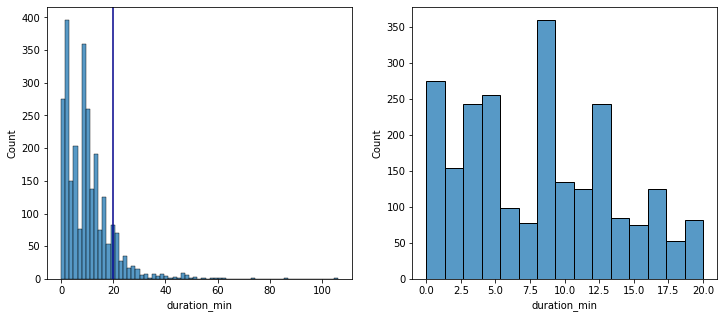

In [155]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data=data2, x='duration_min', ax = axs[0])
axs[0].axvline(x=20, color='darkblue')
sns.histplot(data=data2[data2['duration_min'] <= 20], x='duration_min', ax = axs[1])

print(f"Proportion of Videos Having Shorter Length than 20 mins: {len(data2[data2['duration_min'] <= 20]) / len(data2)}")
print(f"Proportion of Videos Having Shorter Length than 10 mins: {len(data2[data2['duration_min'] <= 10]) / len(data2)}")

Text(0.5, 1.0, 'People & Blogs')

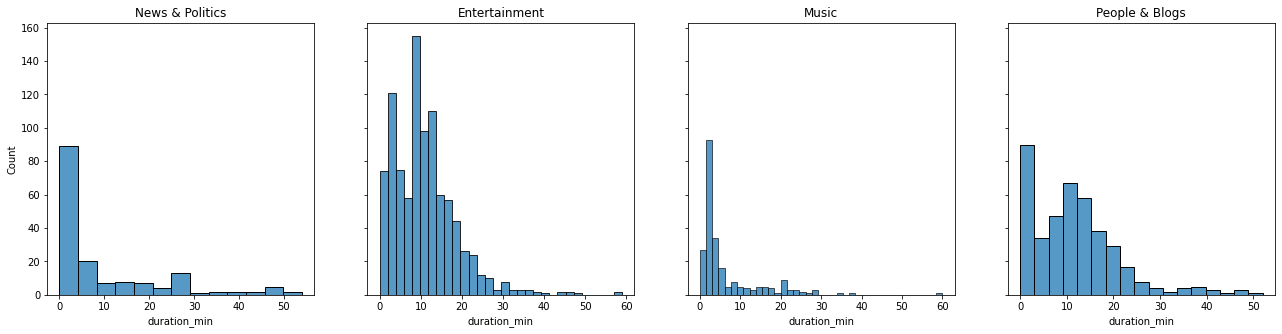

In [208]:
fig, axs = plt.subplots(1, 4, figsize=(22, 5), sharey=True)

sns.histplot(data=data2[data2['category_name']=='News & Politics'], x='duration_min', ax = axs[0])
axs[0].set_title('News & Politics')
sns.histplot(data=data2[data2['category_name']=='Entertainment'], x='duration_min', ax = axs[1])
axs[1].set_title('Entertainment')
sns.histplot(data=data2[data2['category_name']=='Music'], x='duration_min', ax = axs[2])
axs[2].set_title('Music')
sns.histplot(data=data2[data2['category_name']=='People & Blogs'], x='duration_min', ax = axs[3])
axs[3].set_title('People & Blogs')

- **Feature 2: In which category does the video belong?**

C:\Users\minji\AppData\Local\Temp/ipykernel_4460/2228569301.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels = data2['category_name'].unique(), rotation=45)


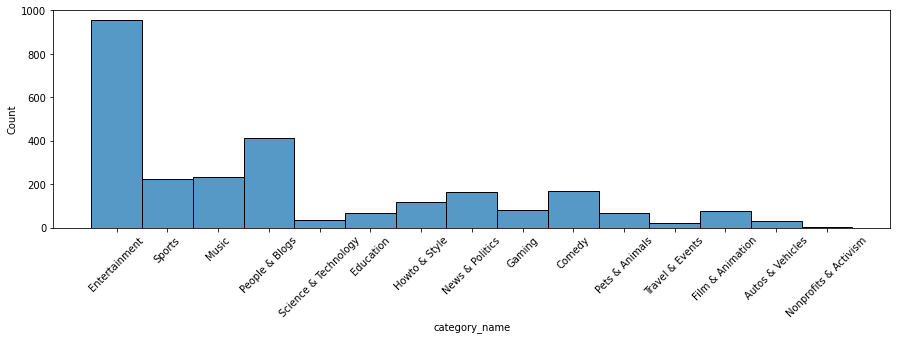

Proportion of Videos Belonging to Entertainment Category: 0.3608169440242057
Proportion of Videos Belonging to People & Blog Category: 0.15544629349470498
Proportion of Videos Belonging to Music Category: 0.08850226928895613
Proportion of Videos Belonging to Sports Category: 0.08396369137670197


In [179]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.histplot(data2, x='category_name')
ax.set_xticklabels(labels = data2['category_name'].unique(), rotation=45)
plt.show()

print(f"Proportion of Videos Belonging to Entertainment Category: {len(data2[data2['category_name'] == 'Entertainment']) / len(data2)}")
print(f"Proportion of Videos Belonging to People & Blog Category: {len(data2[data2['category_name'] == 'People & Blogs']) / len(data2)}")
print(f"Proportion of Videos Belonging to Music Category: {len(data2[data2['category_name'] == 'Music']) / len(data2)}")
print(f"Proportion of Videos Belonging to Sports Category: {len(data2[data2['category_name'] == 'Sports']) / len(data2)}")

- **Feature 3: How quickly should a video earn views/likes/comments?**

'Temperature' refers to how fast views/likes/comments have increased from the 'published_date' until the 'on_trending_date'  
'Temperature' is calculated by 'on_views/likes/comments' divided by 'date difference between published_date and on_trending_date'

$ Temperature = \frac{on\_views/likes/comments}{(on\_trending\_date)-(published\_date)} $

516641.5505925366
31429.690115985875
5888.168387544126


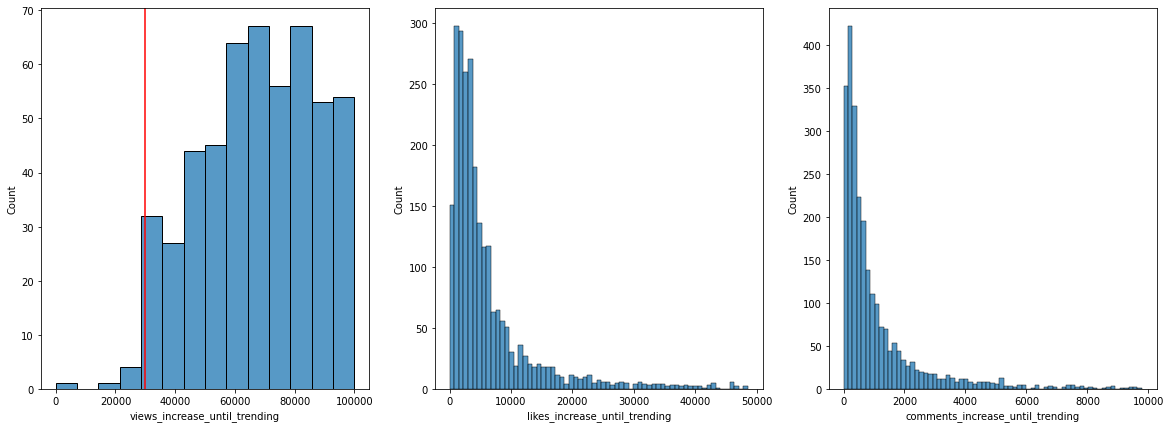

In [252]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

sns.histplot(data2[data2['views_increase_until_trending'] < 100000], x='views_increase_until_trending', ax=axs[0])
axs[0].axvline(x=30000, color='red')
sns.histplot(data2[data2['likes_increase_until_trending'] < 50000], x='likes_increase_until_trending', ax=axs[1])
sns.histplot(data2[data2['comments_increase_until_trending'] < 10000], x='comments_increase_until_trending', ax=axs[2])

print(data2['views_increase_until_trending'].mean())
print(data2['likes_increase_until_trending'].mean())
print(data2['comments_increase_until_trending'].mean())

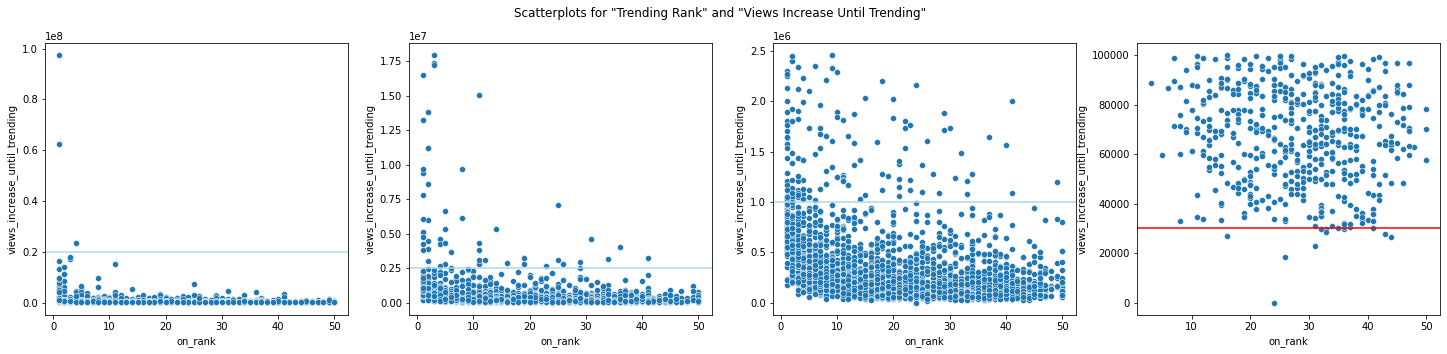

In [236]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))
plt.suptitle('Scatterplots for "Trending Rank" and "Views Increase Until Trending"')

sns.scatterplot(x='on_rank', y='views_increase_until_trending', data=data2, ax=axs[0])
axs[0].axhline(y=0.2*1e8, color='lightblue')
sns.scatterplot(x='on_rank', y='views_increase_until_trending', data=data2[data2['views_increase_until_trending'] < 20000000], ax=axs[1])
axs[1].axhline(y=0.25*1e7, color='lightblue')
sns.scatterplot(x='on_rank', y='views_increase_until_trending', data=data2[data2['views_increase_until_trending'] < 2500000], ax=axs[2])
axs[2].axhline(y=1.0*1e6, color='lightblue')
sns.scatterplot(x='on_rank', y='views_increase_until_trending', data=data2[data2['views_increase_until_trending'] < 100000], ax=axs[3])
axs[3].axhline(y=30000, color='red')

<AxesSubplot:xlabel='on_rank', ylabel='likes_increase_until_trending'>

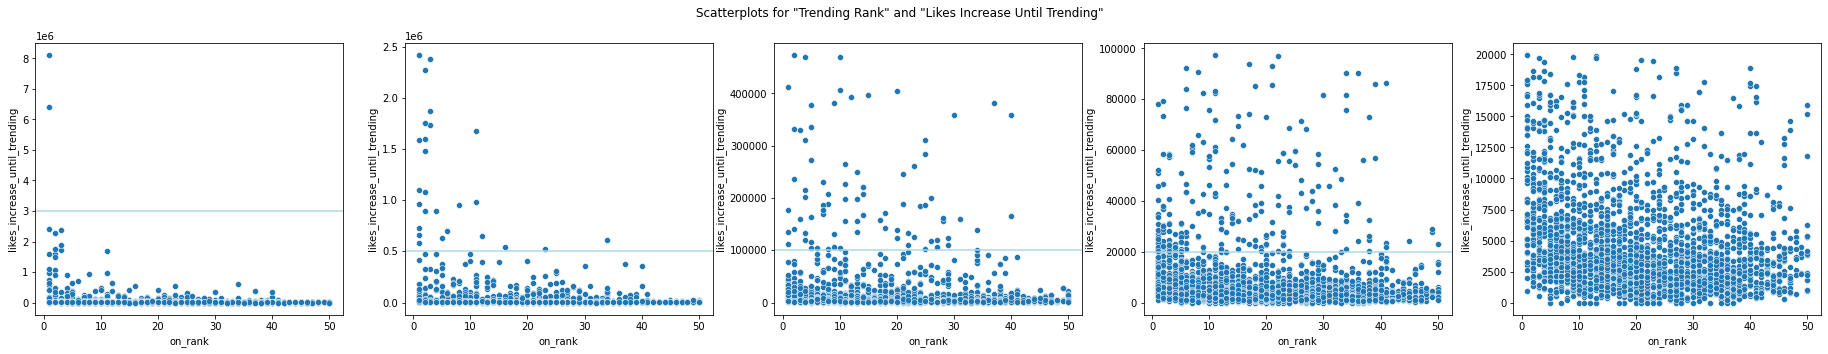

In [123]:
fig, axs = plt.subplots(1, 5, figsize=(32, 5))
plt.suptitle('Scatterplots for "Trending Rank" and "Likes Increase Until Trending"')

sns.scatterplot(x='on_rank', y='likes_increase_until_trending', data=data2, ax=axs[0])
axs[0].axhline(y=3*1e6, color='lightblue')
sns.scatterplot(x='on_rank', y='likes_increase_until_trending', data=data2[data2['likes_increase_until_trending'] < 3*1e6], ax=axs[1])
axs[1].axhline(y=0.5*1e6, color='lightblue')
sns.scatterplot(x='on_rank', y='likes_increase_until_trending', data=data2[data2['likes_increase_until_trending'] < 0.5*1e6], ax=axs[2])
axs[2].axhline(y=100000, color='lightblue')
sns.scatterplot(x='on_rank', y='likes_increase_until_trending', data=data2[data2['likes_increase_until_trending'] < 100000], ax=axs[3])
axs[3].axhline(y=20000, color='lightblue')
sns.scatterplot(x='on_rank', y='likes_increase_until_trending', data=data2[data2['likes_increase_until_trending'] < 20000], ax=axs[4])

<AxesSubplot:xlabel='on_rank', ylabel='comments_increase_until_trending'>

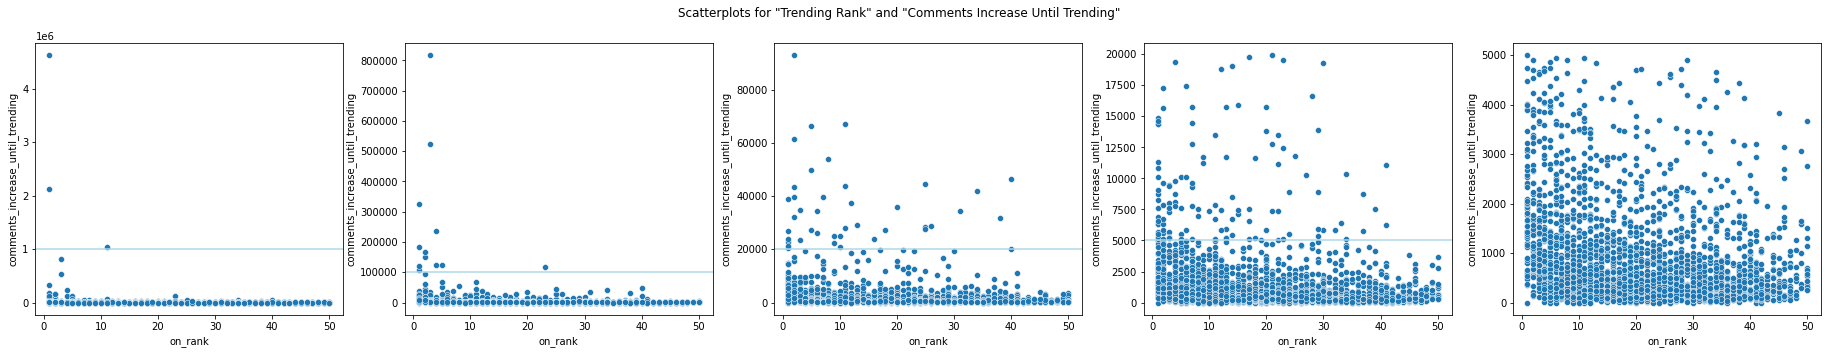

In [128]:
fig, axs = plt.subplots(1, 5, figsize=(32, 5))
plt.suptitle('Scatterplots for "Trending Rank" and "Comments Increase Until Trending"')

sns.scatterplot(x='on_rank', y='comments_increase_until_trending', data=data2, ax=axs[0])
axs[0].axhline(y=1*1e6, color='lightblue')
sns.scatterplot(x='on_rank', y='comments_increase_until_trending', data=data2[data2['comments_increase_until_trending'] < 1*1e6], ax=axs[1])
axs[1].axhline(y=100000, color='lightblue')
sns.scatterplot(x='on_rank', y='comments_increase_until_trending', data=data2[data2['comments_increase_until_trending'] < 100000], ax=axs[2])
axs[2].axhline(y=20000, color='lightblue')
sns.scatterplot(x='on_rank', y='comments_increase_until_trending', data=data2[data2['comments_increase_until_trending'] < 20000], ax=axs[3])
axs[3].axhline(y=5000, color='lightblue')
sns.scatterplot(x='on_rank', y='comments_increase_until_trending', data=data2[data2['comments_increase_until_trending'] < 5000], ax=axs[4])

- **Correlation between Features**

<AxesSubplot:>

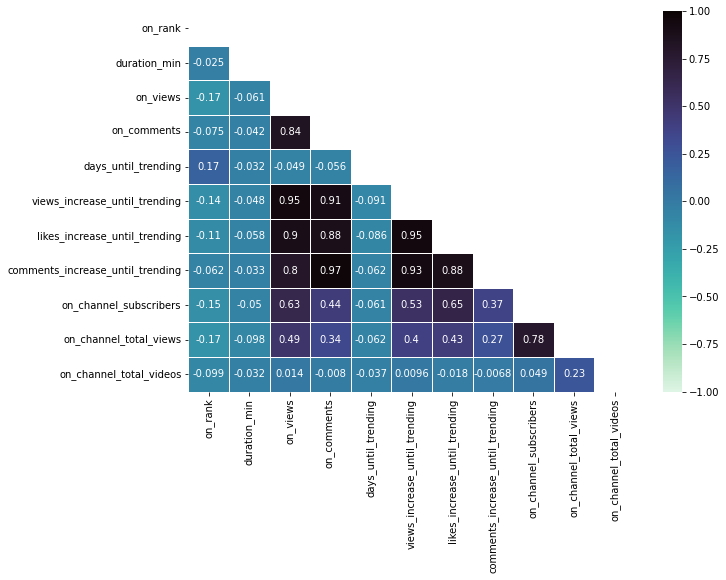

In [255]:
temp_df = data2[['on_rank', 'duration_min', 'on_views', 'on_comments',
                 'days_until_trending', 'views_increase_until_trending', 'likes_increase_until_trending', 'comments_increase_until_trending',
                 'on_channel_subscribers', 'on_channel_total_views', 'on_channel_total_videos']]
corr_df = temp_df.corr()

fig, ax = plt.subplots(figsize=(10, 7))
mask = np.zeros_like(corr_df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_df,
            cmap='mako_r',
            mask=mask,
            annot=True,
            linewidths=.5,
            vmin=-1, vmax=1)

- **Additional Feature: Difference between 'published_date' and 'on_trending_date'**

Proportion of Videos Which Took Less than 3 Days to be Trending: 0.9039334341906202


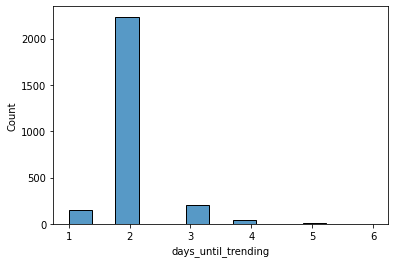

In [253]:
sns.histplot(data=data2, x='days_until_trending')

print(f"Proportion of Videos Which Took Less than 3 Days to be Trending: {len(data2[data2['days_until_trending'] < 3]) / len(data2)}")